The code in this notebook is realized by Carlo Barozzi

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
red=pd.read_csv("winequality-red.csv", delimiter=';')
white=pd.read_csv("winequality-white.csv",delimiter=';')

In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Feature Selection

In [5]:
vals_red = dict(red['quality'].value_counts())
vals_white = dict(white['quality'].value_counts())
x_axis = list(range(11))
values = [[vals_red.get(elt) if vals_red.get(elt) != None else 0 for elt in x_axis],[vals_white.get(elt) if vals_white.get(elt) != None else 0 for elt in x_axis]]

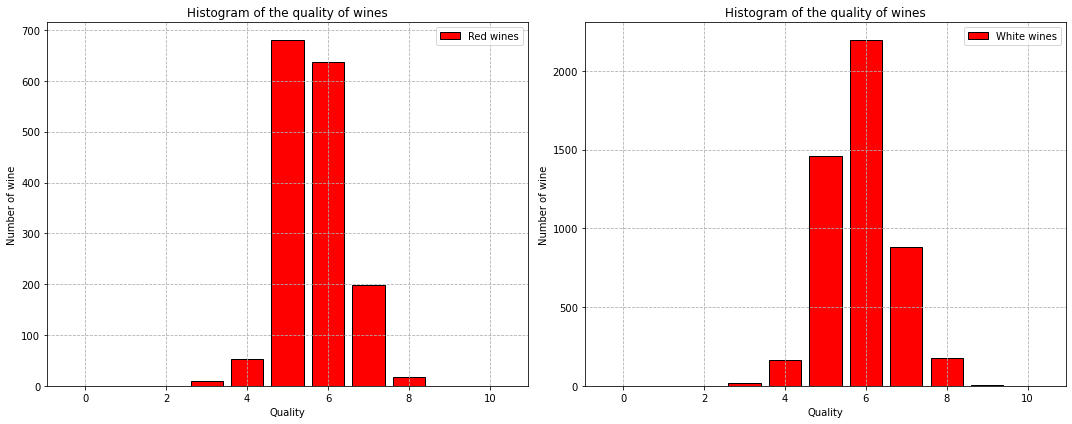

In [6]:
labels = ['Red wines','White wines']
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6),sharey=False)
for i,val in enumerate(values):
    ax[i].bar(x_axis,height=val,color='r',edgecolor='k',label=labels[i])
    ax[i].set_xlabel('Quality')
    ax[i].set_ylabel('Number of wine')
    ax[i].grid(linestyle='--')
    ax[i].legend()
    ax[i].set_title('Histogram of the quality of wines')
    plt.tight_layout()
    ax[i].tick_params(axis='x', rotation=0)
plt.show()

Since the final goal is to predict the quality of wine, let's compute correlation matrix to select the features with the higher correlation to quality

In [7]:
r_square_red=red.corr()['quality']**2
r_square_white= white.corr()['quality']**2

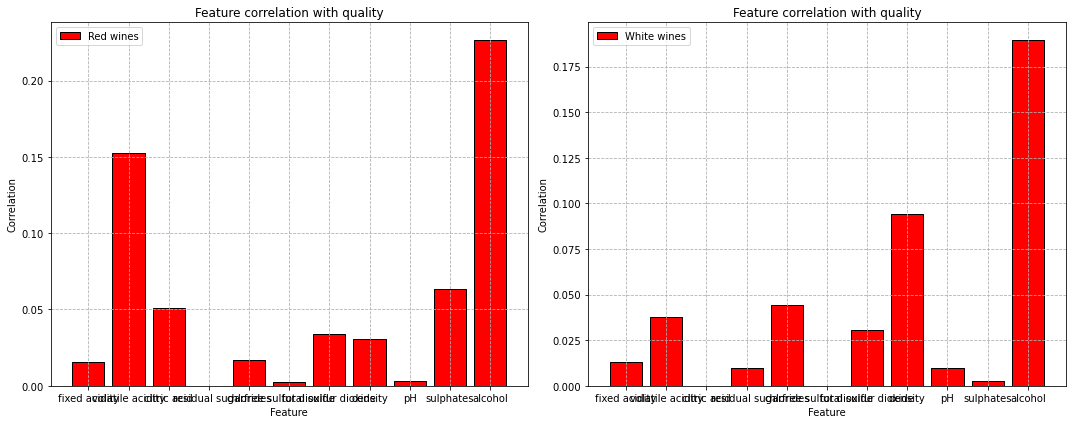

In [8]:
labels = ['Red wines','White wines']
corr=[r_square_red.drop('quality'),r_square_white.drop('quality')]
x_axis=red.columns.drop('quality')
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6),sharey=False)
for i,val in enumerate(values):
    ax[i].bar(x_axis,height=corr[i],color='r',edgecolor='k',label=labels[i])
    ax[i].set_xlabel('Feature')
    ax[i].set_ylabel('Correlation')
    ax[i].grid(linestyle='--')
    ax[i].legend()
    ax[i].set_title('Feature correlation with quality')
    plt.tight_layout()
    ax[i].tick_params(axis='x', rotation=0)

The correlation between the features and the quality is not the same depending on the type of wine. Since the correlation with many feature is weak, we will only keep the features with a $r^2 > 0.05$.

In [9]:
# Drop uncorrelated features
feature_kept_red = list(r_square_red[r_square_red > 0.05].index)
feature_kept_white = list(r_square_white[r_square_white > 0.05].index)

df_red_wine_filtered = red[feature_kept_red]
df_white_wine_filtered = white[feature_kept_white]

In [10]:
#Create the normalized datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
red_col=df_red_wine_filtered.columns.drop('quality')
red_norm=pd.DataFrame(scaler.fit_transform(df_red_wine_filtered.drop('quality', axis=1)), columns=red_col)
white_col=df_white_wine_filtered.columns.drop('quality')
white_norm=pd.DataFrame(scaler.fit_transform(df_white_wine_filtered.drop('quality', axis=1)), columns=white_col)

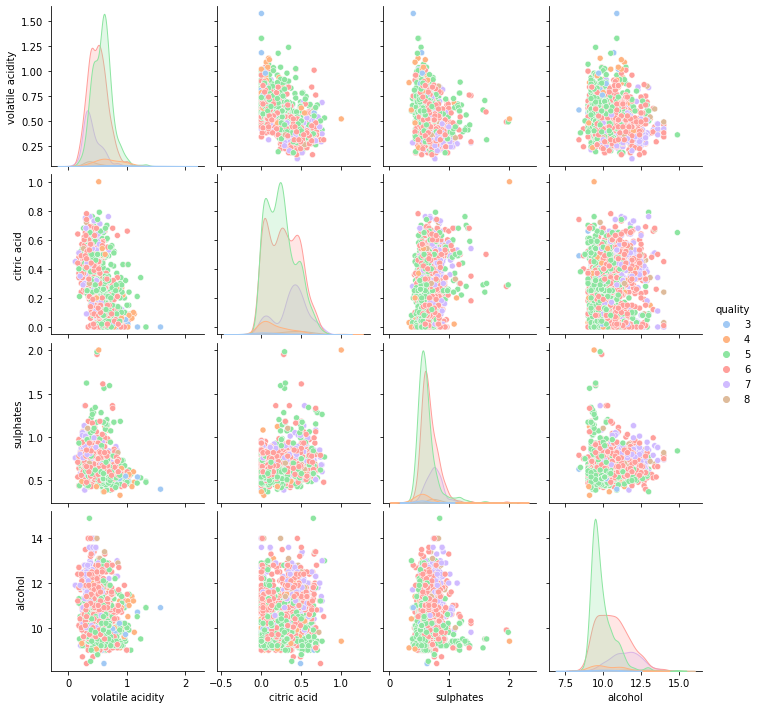

In [11]:
sns.pairplot(df_red_wine_filtered,hue='quality',palette='pastel')

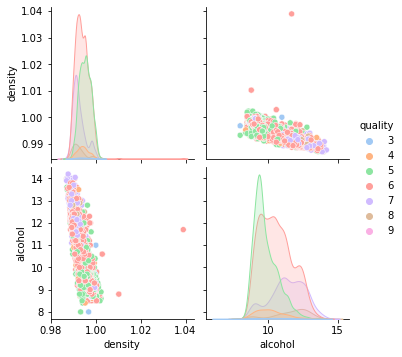

In [12]:
sns.pairplot(df_white_wine_filtered,hue='quality',palette='pastel')

# Data Cleaning and Outlier Detection

The goal of this section is to select outlier points that can negativly influence our prediction models

## Red Wines 

In [13]:
df_red_wine_filtered.describe()

,volatile acidity,citric acid,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.658149,10.422983,5.636023
std,0.179060,0.194801,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.730000,11.100000,6.000000
max,1.580000,1.000000,2.000000,14.900000,8.000000


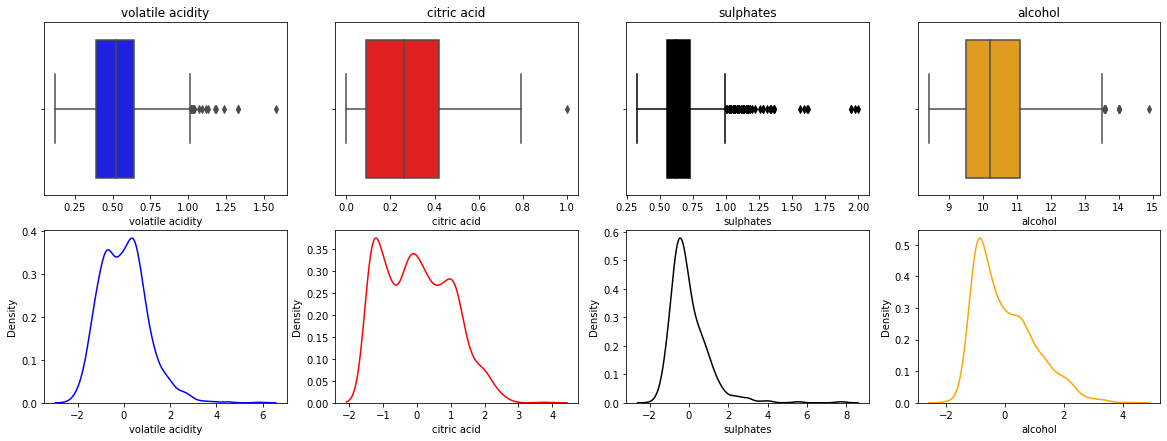

In [14]:
fig, ax= plt.subplots(2,4)
fig.set_size_inches(20,7)
colors=['b','r','k', 'orange']
for i in range(len(df_red_wine_filtered.columns)-1):
    x=df_red_wine_filtered.columns[i]
    sns.boxplot(x=x, data=df_red_wine_filtered, ax=ax[0,i], color=colors[i])
    sns.kdeplot(x=x, data=red_norm, ax=ax[1,i], color=colors[i])
    ax[0,i].set_title(x)
    

Volatile acidity and Sulphates looks like they contain some outlier points. All the distributions can be assumed as normal distribution. Citric Acid looks more as a  ix of different gaussians, but given that the different distibutions are not very separated and there are just one apparent outlier, for our purposes it can also be assumed gaussian. 

### DBSCAN

I will use DBSCAN algorithm to detect noise points. DBSCAN algorithm has one important hyperparameter $eps$, that is the maximum distance between two samples for one to be considered as in the neighborhood of the other. First I will observe the distance from the closest 2 neighbours for each point in order to select a reasonble value for the parameter

In [15]:
from sklearn.cluster import DBSCAN 
from sklearn.metrics import silhouette_score

In [16]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(red_norm)
distances, indices = nbrs.kneighbors(red_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

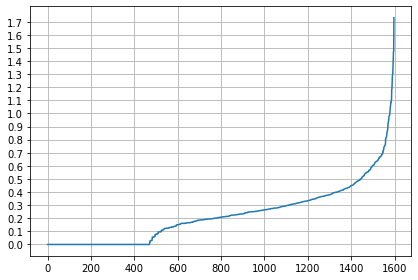

In [17]:
plt.plot(distances[distances<3])
plt.tight_layout()
plt.yticks(np.arange(0,1.8, step=0.1))
plt.grid();

A significant elbow is at distance 0.8, so let's consider $eps$ values from 0.4 to 0.8 and use the silhouette score to select the best one

In [18]:
range_eps=np.arange(0.4, 0.85, step=0.1)
silhouette_scores=[]
for eps in range_eps:
    db= DBSCAN(eps=eps)
    labels= db.fit_predict(red_norm)
    sil=silhouette_score(red_norm, labels)
    silhouette_scores.append(sil)
    print("For eps= ", eps, " the average silhouette score is: ", sil)
eps=range_eps[np.argmax(np.array(silhouette_scores))]
print("Selected value= ",eps)

For eps=  0.4  the average silhouette score is:  -0.3316439642371728
For eps=  0.5  the average silhouette score is:  -0.23162317768916685
For eps=  0.6  the average silhouette score is:  -0.17170144196052686
For eps=  0.7  the average silhouette score is:  0.2333986898126525
For eps=  0.7999999999999999  the average silhouette score is:  0.2501392319201195
Selected value=  0.7999999999999999


After selecting the best $eps$=0.8, I will run one again the DBSCAN and keep the indexes of noise points

In [19]:
db=DBSCAN(eps=eps)
labels=db.fit_predict(red_norm)
noise_pts=red_norm[labels==-1]
for i in range(len(labels)):
    if labels[i]!=-1:
        labels[i]=0
db_drop=noise_pts.index.to_numpy()

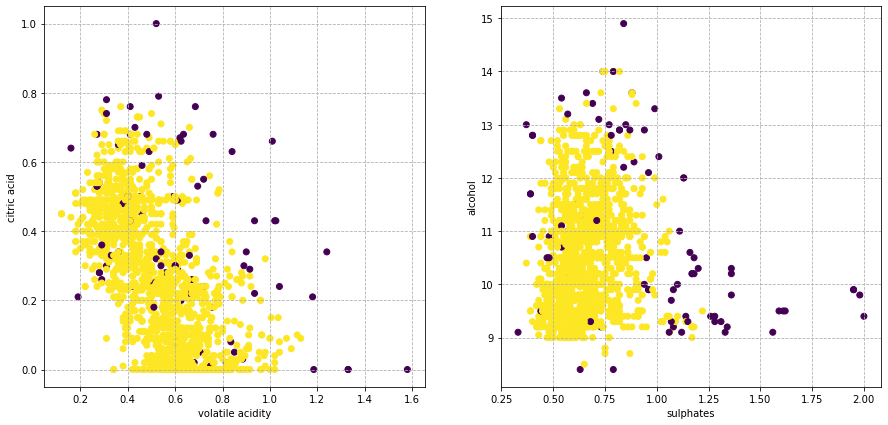

In [20]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)
ax[0].scatter(df_red_wine_filtered['volatile acidity'], df_red_wine_filtered['citric acid'], c=labels)
ax[0].set_xlabel('volatile acidity')
ax[0].set_ylabel('citric acid')
ax[0].grid(linestyle='--')
ax[1].scatter(df_red_wine_filtered['sulphates'], df_red_wine_filtered['alcohol'], c=labels)
ax[1].set_xlabel('sulphates')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

### Isolation Forests

I will run Isolation Forest and also keep the indexes

In [21]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest()
labels=iso.fit_predict(red_norm)
iso_outl=red_norm[labels==-1]
iso_drop=iso_outl.index.to_numpy()

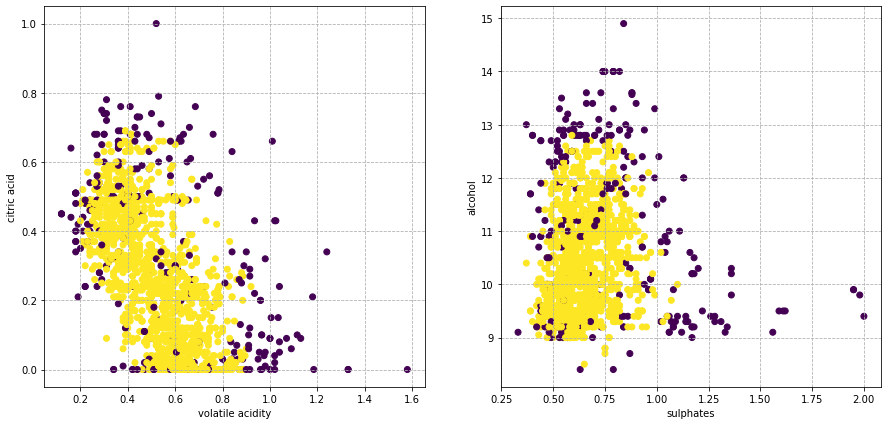

In [22]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)
ax[0].scatter(df_red_wine_filtered['volatile acidity'], df_red_wine_filtered['citric acid'], c=labels)
ax[0].set_xlabel('volatile acidity')
ax[0].set_ylabel('citric acid')
ax[0].grid(linestyle='--')
ax[1].scatter(df_red_wine_filtered['sulphates'], df_red_wine_filtered['alcohol'], c=labels)
ax[1].set_xlabel('sulphates')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

### Statistical Methods

In [23]:
def ColumnFilter(x):
    std=x.std()
    m=x.mean()
    indextodrop=x[(x>m+3*std) | (x<m-3*std)].index.to_numpy()
    return indextodrop

In [24]:
def DataFrameColumnFiltering(df):
    indextodrop=np.array([])
    for x in df.columns:
        indextodrop=np.concatenate((indextodrop, ColumnFilter(df[x])), axis=None)
    indextodrop=np.unique(indextodrop)
    return indextodrop

In [25]:
stats_drop=DataFrameColumnFiltering(red_norm)
labels=[0]*len(red_norm)
for i in stats_drop:
    labels[int(i)]=-1

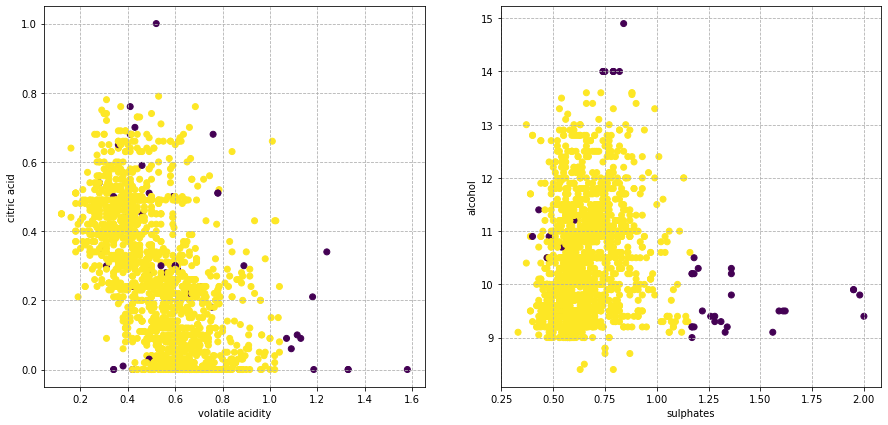

In [26]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)
ax[0].scatter(df_red_wine_filtered['volatile acidity'], df_red_wine_filtered['citric acid'], c=labels)
ax[0].set_xlabel('volatile acidity')
ax[0].set_ylabel('citric acid')
ax[0].grid(linestyle='--')
ax[1].scatter(df_red_wine_filtered['sulphates'], df_red_wine_filtered['alcohol'], c=labels)
ax[1].set_xlabel('sulphates')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

### Elliptic Envelope

In [27]:
from sklearn.covariance import EllipticEnvelope
cov=EllipticEnvelope()
labels=cov.fit_predict(red_norm)
cov_outl=red_norm[labels==-1]
cov_drop=cov_outl.index.to_numpy()

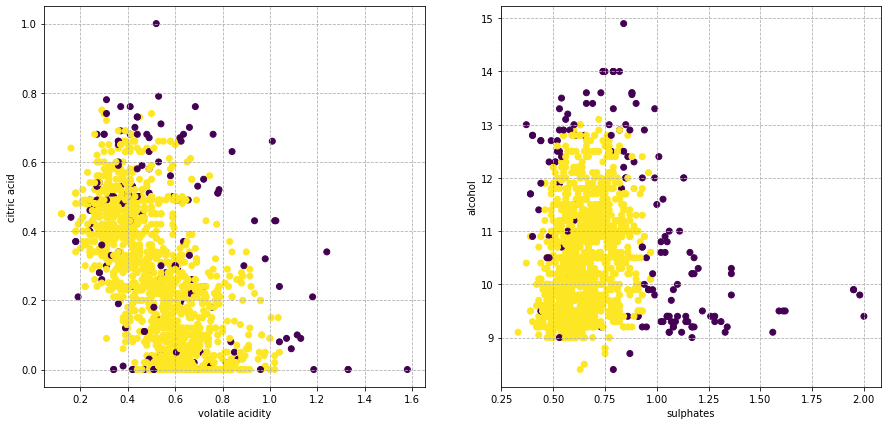

In [28]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)
ax[0].scatter(df_red_wine_filtered['volatile acidity'], df_red_wine_filtered['citric acid'], c=labels)
ax[0].set_xlabel('volatile acidity')
ax[0].set_ylabel('citric acid')
ax[0].grid(linestyle='--')
ax[1].scatter(df_red_wine_filtered['sulphates'], df_red_wine_filtered['alcohol'], c=labels)
ax[1].set_xlabel('sulphates')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

### Local Outlier Factor

In [29]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
labels=lof.fit_predict(red_norm)
lof_outl=red_norm[labels==-1]
lof_drop=lof_outl.index.to_numpy()

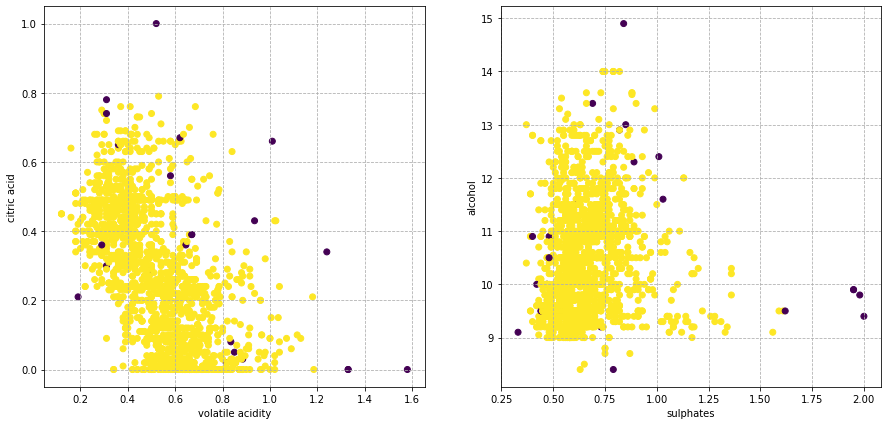

In [30]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)
ax[0].scatter(df_red_wine_filtered['volatile acidity'], df_red_wine_filtered['citric acid'], c=labels)
ax[0].set_xlabel('volatile acidity')
ax[0].set_ylabel('citric acid')
ax[0].grid(linestyle='--')
ax[1].scatter(df_red_wine_filtered['sulphates'], df_red_wine_filtered['alcohol'], c=labels)
ax[1].set_xlabel('sulphates')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

### One Class SVM

In [31]:
from sklearn.svm import OneClassSVM
svm=OneClassSVM()
labels=svm.fit_predict(red_norm)
svm_outl=red_norm[labels==-1]
svm_drop=svm_outl.index.to_numpy()

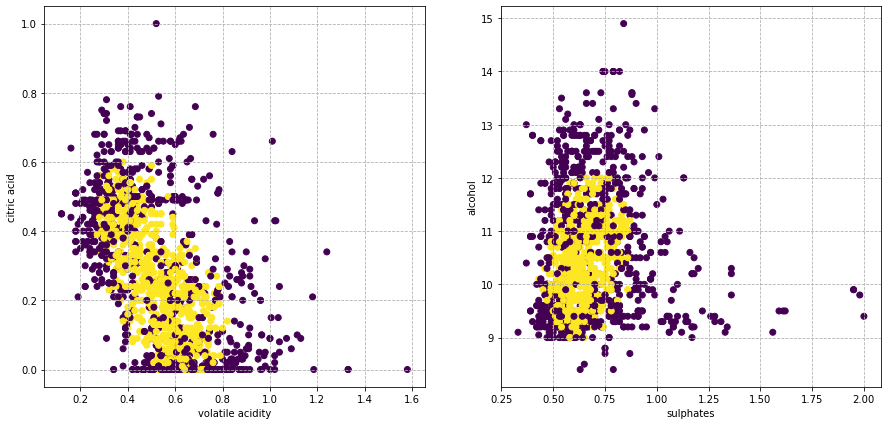

In [32]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)
ax[0].scatter(df_red_wine_filtered['volatile acidity'], df_red_wine_filtered['citric acid'], c=labels)
ax[0].set_xlabel('volatile acidity')
ax[0].set_ylabel('citric acid')
ax[0].grid(linestyle='--')
ax[1].scatter(df_red_wine_filtered['sulphates'], df_red_wine_filtered['alcohol'], c=labels)
ax[1].set_xlabel('sulphates')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

### Selection

DBSCAN  dropped  89  points
Isolation Forest  dropped  262  points
Elliptic Envelope  dropped  160  points
LOF  dropped  25  points
SVM  dropped  794  points
Statistical method  dropped  45  points


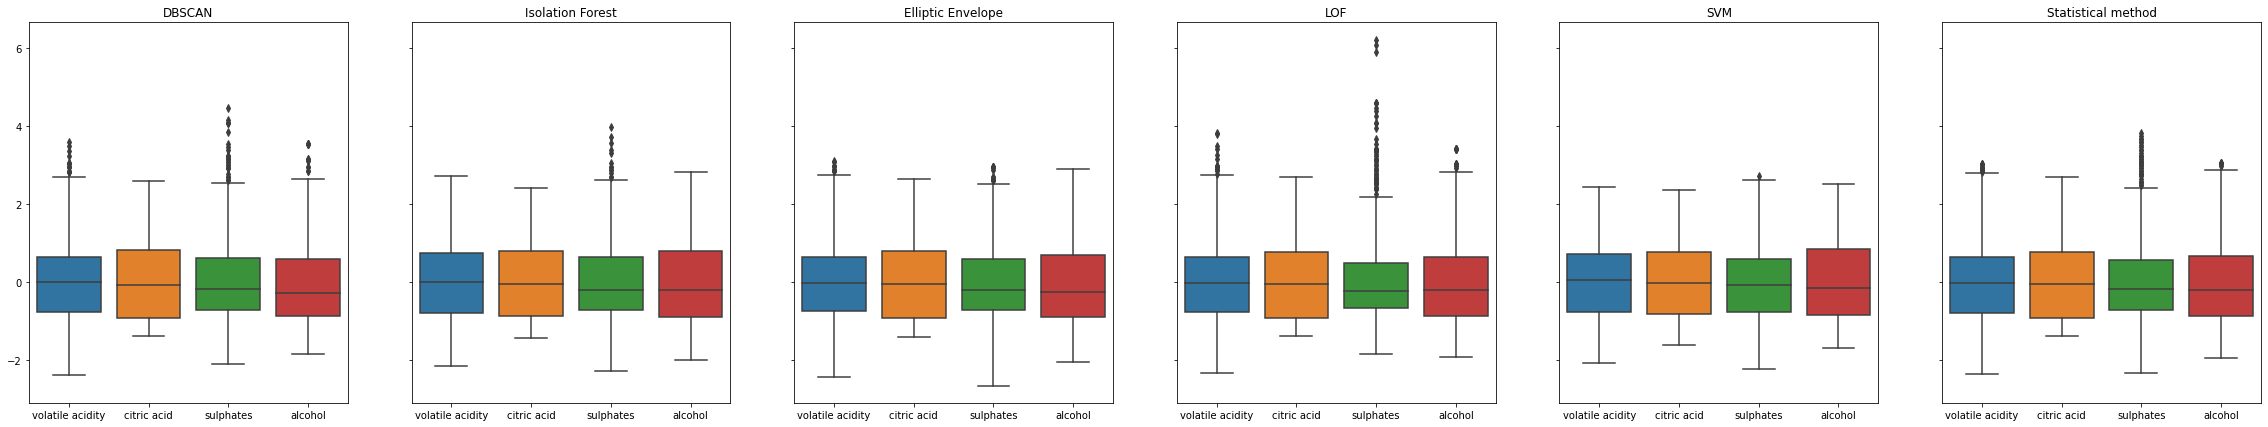

In [34]:
fig, ax=plt.subplots(1,6, sharey=True)
fig.set_size_inches(40,7)
drop=[db_drop,iso_drop, cov_drop, lof_drop,svm_drop, stats_drop]
label=['DBSCAN', 'Isolation Forest', 'Elliptic Envelope', 'LOF', 'SVM', 'Statistical method']
for i in range(len(drop)):
    dropped_df=pd.DataFrame(scaler.fit_transform(df_red_wine_filtered.drop(drop[i],axis=0).drop('quality', axis=1)), columns=red_col)
    sns.boxplot(data=dropped_df,ax=ax[i])
    ax[i].set_title(label[i])
    print(label[i], " dropped ", len(drop[i]), " points")

I compared the results based on the number of dropped points and by looking athe the distibutions after dropping the outliers found by each method. SVM dropped almost half the dataset, while LOF and Univariate statistical methods just dropped a few points detecting just the most obvious otuliers. Elliptic Envelope selected around 10\% of the dataset and the final distributions looks very clean, so I will use it to clean the dataset


In [37]:
selceted_drop=cov_drop
df_red_wine_cleaned=df_red_wine_filtered.drop(selceted_drop)

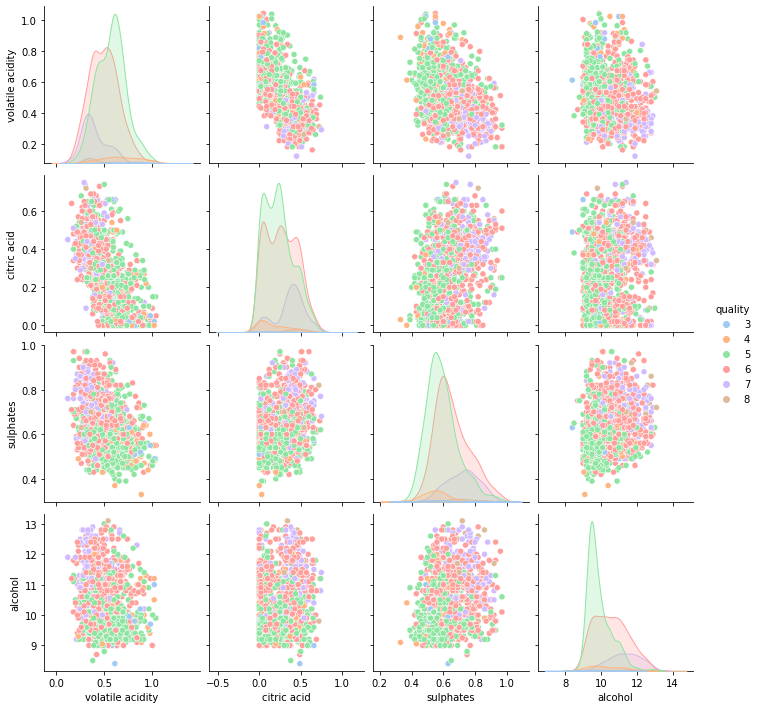

In [38]:
sns.pairplot(df_red_wine_cleaned, hue='quality', palette='pastel')

Looking at the scatters plot looks like most of the points are well disriubuted over the center, and no clear outliers stands out.

## White Wines

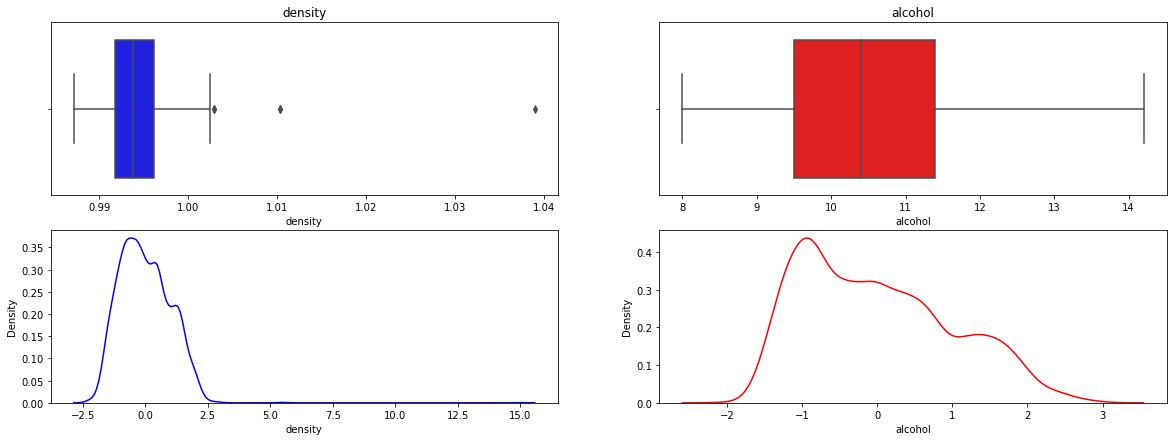

In [39]:
fig, ax= plt.subplots(2,2)
fig.set_size_inches(20,7)
colors=['b','r']
for i in range(len(df_white_wine_filtered.columns)-1):
    x=df_white_wine_filtered.columns[i]
    sns.boxplot(x=x, data=df_white_wine_filtered, ax=ax[0,i], color=colors[i])
    sns.kdeplot(x=x, data=white_norm, ax=ax[1,i], color=colors[i])
    ax[0,i].set_title(x)

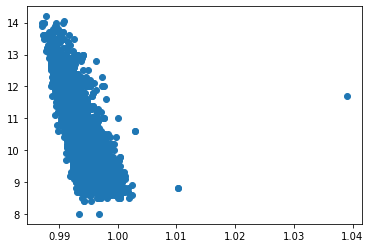

In [40]:
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'])

The data aldready looks pretty clean, most of them are located in what looks like a big single cluster. The dataset suggest that a density based method can be the best fit.

### DBSCAN

In [41]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(white_norm)
distances, indices = nbrs.kneighbors(white_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

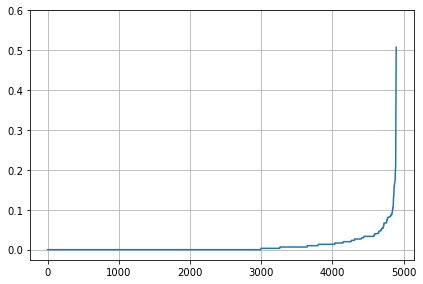

In [42]:
plt.plot(distances[distances<0.6])
plt.tight_layout()
plt.yticks(np.arange(0,0.7, step=0.1))
plt.grid();

In [43]:
range_eps=np.arange(0.1, 0.55, step=0.1)
silhouette_scores=[]
for eps in range_eps:
    db= DBSCAN(eps=eps)
    labels= db.fit_predict(white_norm)
    sil=silhouette_score(white_norm, labels)
    silhouette_scores.append(sil)
    print("For eps= ", eps, " the average silhouette score is: ", sil)
eps=range_eps[np.argmax(np.array(silhouette_scores))]
print("Selected value= ",eps)

For eps=  0.1  the average silhouette score is:  -0.48263046821459316
For eps=  0.2  the average silhouette score is:  -0.0218711185434381
For eps=  0.30000000000000004  the average silhouette score is:  0.5504930914499656
For eps=  0.4  the average silhouette score is:  0.633610653953145
For eps=  0.5  the average silhouette score is:  0.6804309386488001
Selected value=  0.5


Looking at the graph, 0.1 looks like the elbow, but given the poor performances of a small eps I selected 0.5, that is also the default value for it

In [44]:
db=DBSCAN(eps=eps)
labels=db.fit_predict(white_norm)
noise_pts=white_norm[labels==-1]
for i in range(len(labels)):
    if labels[i]!=-1:
        labels[i]=0
db_drop=noise_pts.index.to_numpy()

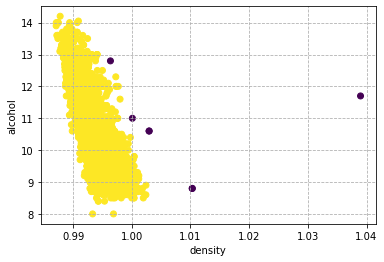

In [45]:
fig.set_size_inches(15,8)
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'], c=labels, )
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(linestyle='--')

### Isolation Forests

In [46]:
labels=iso.fit_predict(white_norm)
iso_outl=white_norm[labels==-1]
iso_drop=iso_outl.index.to_numpy()

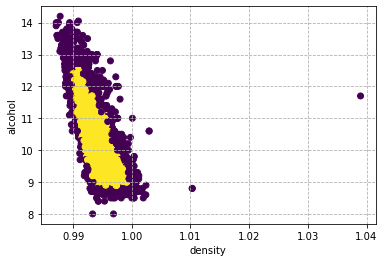

In [47]:
fig.set_size_inches(15,8)
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'], c=labels, )
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(linestyle='--')

### Elliptic Envelope

In [48]:
cov=EllipticEnvelope()
labels=cov.fit_predict(white_norm)
cov_outl=white_norm[labels==-1]
cov_drop=cov_outl.index.to_numpy()

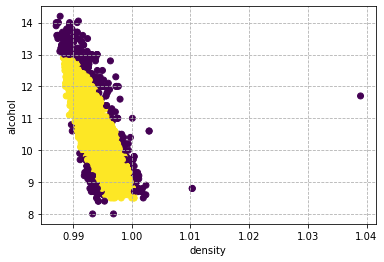

In [49]:
fig.set_size_inches(15,8)
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'], c=labels, )
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(linestyle='--')

### Statistical Methods

In [50]:
stats_drop=DataFrameColumnFiltering(white_norm)
labels=[0]*len(white_norm)
for i in stats_drop:
    labels[int(i)]=-1

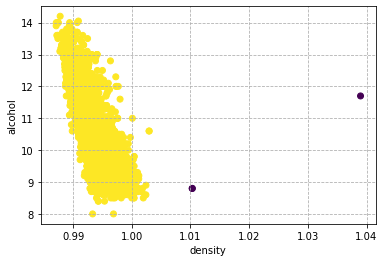

In [51]:
fig.set_size_inches(15,8)
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'], c=labels, )
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(linestyle='--')

### Local Otulier Factor

In [52]:
lof=LocalOutlierFactor()
labels=lof.fit_predict(white_norm)
lof_outl=white_norm[labels==-1]
lof_drop=lof_outl.index.to_numpy()

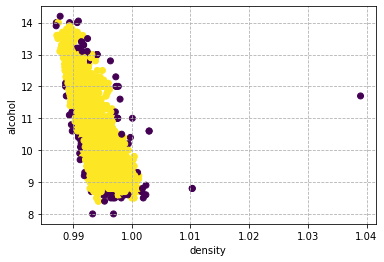

In [53]:
fig.set_size_inches(15,8)
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'], c=labels, )
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(linestyle='--')

### One Class SVM

In [54]:
svm=OneClassSVM()
labels=svm.fit_predict(white_norm)
svm_outl=white_norm[labels==-1]
svm_drop=svm_outl.index.to_numpy()

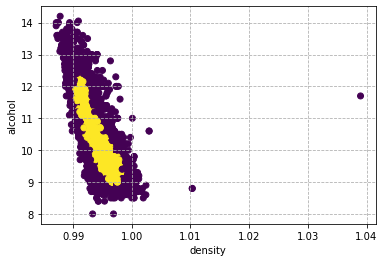

In [55]:
fig.set_size_inches(15,8)
plt.scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'], c=labels, )
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(linestyle='--')

### Selction

DBSCAN  dropped  7  points
Isolation Forest  dropped  1256  points
Elliptic Envelope  dropped  490  points
LOF  dropped  90  points
SVM  dropped  2450  points
Stats  dropped  3  points


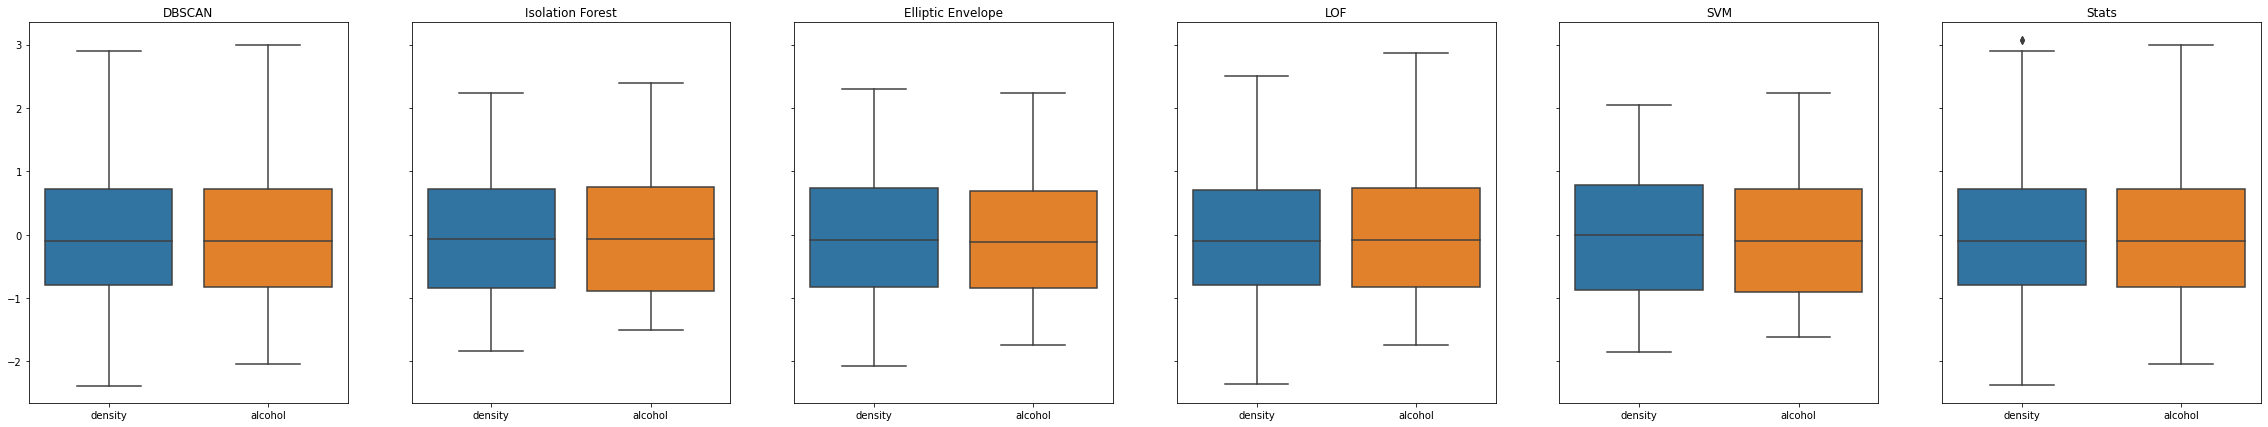

In [57]:
fig, ax=plt.subplots(1,6, sharey=True)
fig.set_size_inches(40,7)
drop=[db_drop,iso_drop, cov_drop, lof_drop,svm_drop, stats_drop]
label=['DBSCAN', 'Isolation Forest', 'Elliptic Envelope', 'LOF', 'SVM', 'Stats']
for i in range(len(drop)):
    dropped_df=pd.DataFrame(scaler.fit_transform(df_white_wine_filtered.drop(drop[i],axis=0).drop('quality', axis=1)), columns=white_col)
  
    sns.boxplot(data=dropped_df,ax=ax[i])
    ax[i].set_title(label[i])
    print(label[i], " dropped ", len(drop[i]), " points")

Looking at the scatter plots for each method, SVM and Isolation Forest selected way too many points, while DBSCAN and Univariate Statistical methods slected just the clearest outliers. LOF is the one that had the most intresting results selecting just points at the border of the big cluster with a lower density than the rest

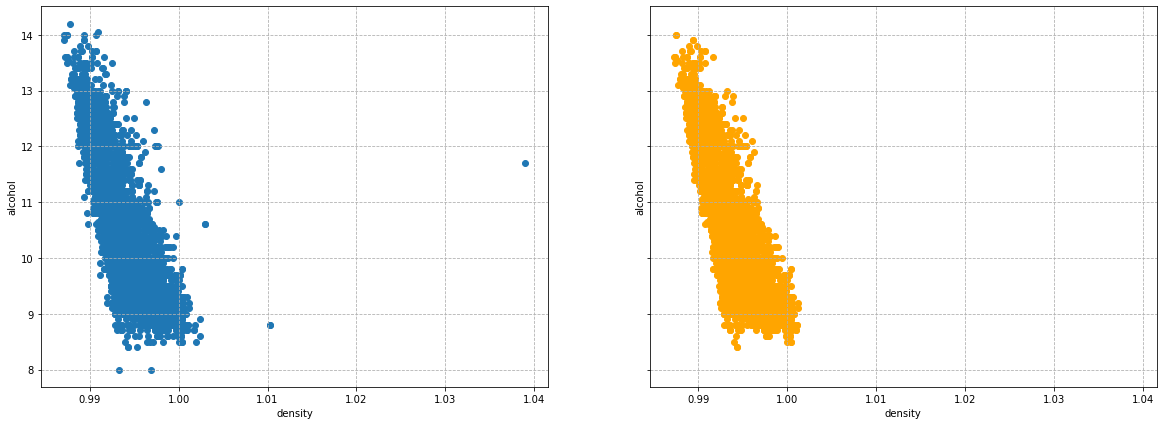

In [58]:
fig, ax= plt.subplots(1,2,sharex=True, sharey=True)
fig.set_size_inches(20,7)
selected_drop=lof_drop
df_white_wine_cleaned=df_white_wine_filtered.drop(selected_drop)
ax[1].scatter(df_white_wine_cleaned['density'], df_white_wine_cleaned['alcohol'], c='orange')
ax[0].scatter(df_white_wine_filtered['density'], df_white_wine_filtered['alcohol'])
ax[0].set_xlabel('density')
ax[0].set_ylabel('alcohol')
ax[0].grid(linestyle='--')
ax[1].set_xlabel('density')
ax[1].set_ylabel('alcohol')
ax[1].grid(linestyle='--')

In [59]:
#saving cleaned Datasets
df_red_wine_cleaned.to_csv("winequality-red-cleaned.csv")
df_white_wine_cleaned.to_csv("winequality-white-cleaned.csv")